***
# ISOM3360 Data Mining for Business Analytics
## Group 23 Project Code - Credit Card Defaultee Analysis
### Part 2.1 - Decision Tree Classifier
***

Name: LAM, Ho Chit  
ITSC: hclamao  
SID: 20607878

Name: LEE, Ho Wan Owen  
ITSC: hwolee  
SID: 20604852

Name: LEE, Wai Chung  
ITSC: wcleeaj  
SID: 20702733

### Data preprocessing(cont.)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
#Load cleaned data
#p.s. I first put the cleaned data in data preprocessing part I (before splitting) to the decision tree file before running the code below
raw_df = pd.read_csv('raw2.csv',index_col = 'SK_ID_CURR')

### Dealing with missing values

In [4]:
raw_df.isnull().sum().sum()
#There're many missing values

9054490

In [5]:
pd.set_option('display.max_rows', 500)

In [6]:
raw_df.isnull().sum()

TARGET                                                    0
NAME_CONTRACT_TYPE                                        0
FLAG_OWN_CAR                                              0
CNT_CHILDREN                                              0
AMT_INCOME_TOTAL                                          0
AMT_CREDIT                                                0
AMT_ANNUITY                                               0
AMT_GOODS_PRICE                                           0
REGION_POPULATION_RELATIVE                                0
DAYS_BIRTH                                                0
DAYS_EMPLOYED                                             0
DAYS_REGISTRATION                                         0
DAYS_ID_PUBLISH                                           0
OWN_CAR_AGE                                          202929
FLAG_MOBIL                                                0
FLAG_EMP_PHONE                                            0
FLAG_WORK_PHONE                         

In [7]:
# Filling missing values with mean or mode
raw_df['OBS_30_CNT_SOCIAL_CIRCLE'].mean()

1.4222454239942575

In [8]:
# replace missing values with mean or mode
raw_df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(raw_df['OBS_30_CNT_SOCIAL_CIRCLE'].mean(),inplace=True)

In [9]:
#Doing the same for other relavent features
raw_df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(raw_df['DEF_30_CNT_SOCIAL_CIRCLE'].mean(),inplace=True)
raw_df['DEF_30_CNT_SOCIAL_CIRCLE'].mean()

0.1434206662533827

In [10]:
raw_df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(raw_df['OBS_60_CNT_SOCIAL_CIRCLE'].mean(),inplace=True)
raw_df['OBS_60_CNT_SOCIAL_CIRCLE'].mean()

1.4052921791902133

In [11]:
raw_df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(raw_df['DEF_60_CNT_SOCIAL_CIRCLE'].mean(),inplace=True)
raw_df['DEF_60_CNT_SOCIAL_CIRCLE'].mean()

0.10004894123788487

In [12]:
# replace missing values with mode
raw_df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(raw_df['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0],inplace=True)
raw_df['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0]

0.0

In [13]:
raw_df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(raw_df['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0],inplace=True)
raw_df['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0]

0.0

In [14]:
raw_df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(raw_df['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0],inplace=True)
raw_df['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0]

0.0

In [15]:
raw_df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(raw_df['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0],inplace=True)
raw_df['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0]

0.0

In [16]:
raw_df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(raw_df['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0],inplace=True)
raw_df['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0]

0.0

In [17]:
raw_df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(raw_df['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0],inplace=True)
raw_df['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0]

0.0

In [18]:
# replace missing values with mean
raw_df['DAYS_LAST_PHONE_CHANGE'].fillna(raw_df['DAYS_LAST_PHONE_CHANGE'].mean(),inplace=True)
raw_df['DAYS_LAST_PHONE_CHANGE'].mean()

-962.8587883320869

In [19]:
raw_df['EXT_SOURCE_2'].fillna(raw_df['EXT_SOURCE_2'].mean(),inplace=True)
raw_df['EXT_SOURCE_2'].mean()

0.5143926741308488

In [20]:
raw_df['EXT_SOURCE_3'].fillna(raw_df['EXT_SOURCE_3'].mean(),inplace=True)
raw_df['EXT_SOURCE_3'].mean()

0.5108529061805426

In [21]:
raw_df.isnull().sum()

TARGET                                                    0
NAME_CONTRACT_TYPE                                        0
FLAG_OWN_CAR                                              0
CNT_CHILDREN                                              0
AMT_INCOME_TOTAL                                          0
AMT_CREDIT                                                0
AMT_ANNUITY                                               0
AMT_GOODS_PRICE                                           0
REGION_POPULATION_RELATIVE                                0
DAYS_BIRTH                                                0
DAYS_EMPLOYED                                             0
DAYS_REGISTRATION                                         0
DAYS_ID_PUBLISH                                           0
OWN_CAR_AGE                                          202929
FLAG_MOBIL                                                0
FLAG_EMP_PHONE                                            0
FLAG_WORK_PHONE                         

In [22]:
#Drop the columns that has number of missing values >100000
raw_df = raw_df.dropna(axis=1)

In [23]:
raw_df.isnull().sum()

TARGET                                               0
NAME_CONTRACT_TYPE                                   0
FLAG_OWN_CAR                                         0
CNT_CHILDREN                                         0
AMT_INCOME_TOTAL                                     0
AMT_CREDIT                                           0
AMT_ANNUITY                                          0
AMT_GOODS_PRICE                                      0
REGION_POPULATION_RELATIVE                           0
DAYS_BIRTH                                           0
DAYS_EMPLOYED                                        0
DAYS_REGISTRATION                                    0
DAYS_ID_PUBLISH                                      0
FLAG_MOBIL                                           0
FLAG_EMP_PHONE                                       0
FLAG_WORK_PHONE                                      0
FLAG_CONT_MOBILE                                     0
FLAG_PHONE                                           0
FLAG_EMAIL

In [24]:
#Save the data to a new file
raw_df.to_csv('raw_no_missing.csv')

### Perform one-hot encoding

In [25]:
raw_df = pd.get_dummies(raw_df, columns=['NAME_CONTRACT_TYPE','OCCUPATION_TYPE','FLAG_OWN_CAR','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','MALE'],drop_first = True)

#p.s. for Naive Bayes Classification, set drop_first = False. Also, no need modification on MALE and FEMALE.
# Also for NB, do not drop Female
raw_df = raw_df.drop(columns='FEMALE')

In [26]:
raw_df.isnull().sum()

TARGET                                               0
CNT_CHILDREN                                         0
AMT_INCOME_TOTAL                                     0
AMT_CREDIT                                           0
AMT_ANNUITY                                          0
AMT_GOODS_PRICE                                      0
REGION_POPULATION_RELATIVE                           0
DAYS_BIRTH                                           0
DAYS_EMPLOYED                                        0
DAYS_REGISTRATION                                    0
DAYS_ID_PUBLISH                                      0
FLAG_MOBIL                                           0
FLAG_EMP_PHONE                                       0
FLAG_WORK_PHONE                                      0
FLAG_CONT_MOBILE                                     0
FLAG_PHONE                                           0
FLAG_EMAIL                                           0
CNT_FAM_MEMBERS                                      0
REGION_RAT

### Let's build the first Decision Tree
we will use all the data to construct the tree and evaluate the model

#### Step 1: Define features and target variable

In [27]:
#Get column names
attirbutes =sorted(raw_df)
attirbutes.remove('TARGET')
attirbutes

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_INCOME_TOTAL_MINMAX',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_EMAIL',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL',
 'FL

In [28]:
# define independent variables / attirbutes / features
features = attirbutes
# define one single target variable / label
target = ['TARGET']

# get defined training dataset
X = raw_df[features]
y = raw_df[target]

#### Step 2: Split data into training and hold-out test set

In [29]:
# import train split function
from sklearn.model_selection import train_test_split

# split data into 80% and 20%, put 20% in testing
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=3360)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246008 entries, 269894 to 228644
Columns: 170 entries, AMT_ANNUITY to WEEKDAY_APPR_PROCESS_START_WEDNESDAY
dtypes: float64(21), int64(66), uint8(83)
memory usage: 184.6 MB


#### Step 3: Build a Tree based on 80% train data

In [30]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
# define our model as a decision tree model
model = DecisionTreeClassifier(random_state=3360)

In [32]:
# build the decision tree model based on defalut hyperparameter settings
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=3360, splitter='best')

#### Visualize the Decision Tree? No. Tree is too big to be visualized.

In [33]:
# import library for visuaiization
# from sklearn import tree
# import matplotlib.pyplot as plt

In [34]:
# plt.figure(figsize = (100,150))
# tree.plot_tree(model,ax=None, fontsize=50)
# plt.show()

#### Step 4: Evaluate the model on 20% validation set

- Calculate:
  - Accuracy
  - Precision
  - Recall
  <!-- - F1 score -->
- Display confusion matrix

In [35]:
# import evaluation tools
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [36]:
# test model base on 20% data
pred_val = model.predict(X_val)

In [37]:
# print evaluation result for 20% test data
print("Accuracy from 20% test data:",accuracy_score(y_val, pred_val, normalize=True, sample_weight=None))
print("Confusion Matrix", '\n', confusion_matrix(y_val, pred_val))
print("Classification Report:", '\n', classification_report(y_val, pred_val))

Accuracy from 20% test data: 0.8543323089930572
Confusion Matrix 
 [[51735  4886]
 [ 4073   809]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92     56621
           1       0.14      0.17      0.15      4882

    accuracy                           0.85     61503
   macro avg       0.53      0.54      0.54     61503
weighted avg       0.86      0.85      0.86     61503



In [38]:
# test model base on 80% data for training
pred_val_Xtrain= model.predict(X_train)

In [39]:
# print evaluation result for 80% train data
print("Accuracy from 80% train data:",accuracy_score(y_train, pred_val_Xtrain, normalize=True, sample_weight=None))
print("Confusion Matrix", '\n', confusion_matrix(y_train, pred_val_Xtrain))
print("Classification Report:", '\n', classification_report(y_train, pred_val_Xtrain))

Accuracy from 80% train data: 1.0
Confusion Matrix 
 [[226065      0]
 [     0  19943]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    226065
           1       1.00      1.00      1.00     19943

    accuracy                           1.00    246008
   macro avg       1.00      1.00      1.00    246008
weighted avg       1.00      1.00      1.00    246008



Since the difference between training and validation accuracy is substantial and the training accuracy is 100%, overfitting occured in this model with default hyperparameters.  
There are 3 methods to reduce overfitting:
- Hyperparameter tuning (manual)
- Cross validation
- Hyperparameter tuning (via GridSearchCV)

### Manual Hyperparameter Tuning (Tuning tree depth)

#### Let's fit the decision tree with depths ranging from 1 to 32 and plot the train and test accuracy scores

In [40]:
# create an array that holds the max_depth
max_depth = np. linspace(1,15,15, endpoint=True)

In [41]:
max_depth

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15.])

In [42]:
# create a loop to try out different depth value
train_results =[]
test_results = []
# create a loop to try out all the number from 1 to 15 for max_depths in a decision tree
for max_depth_i in max_depth:
    dt = DecisionTreeClassifier(max_depth=max_depth_i)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    accuracy = accuracy_score(y_train, train_pred, normalize=True, sample_weight=None)
    train_results.append(accuracy)
    
    y_pred = dt.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred, normalize=True, sample_weight=None)
    test_results.append(accuracy)

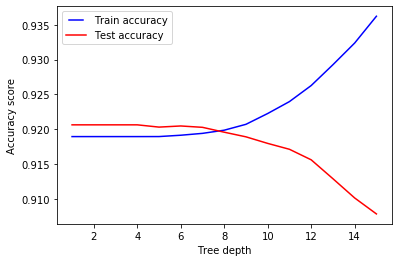

In [43]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth, train_results, 'b', label='Train accuracy')
line2, = plt.plot(max_depth, test_results, 'r', label='Test accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()

It seems that max_depth around 2 is appropriate. (There seems to be serious overfitting problem.)

### 3-fold Cross validation for tuning min_samples_leaf

In [44]:
# Function to plot the results
def plot_fitting_curves(results):
    results.plot("min_leaves")
    plt.ylabel("Accuracy")
    plt.xlabel("Min samples per leaf (inverse of complexity)")
    plt.show()

Size of training data: 196806
Size of validation data: 61503


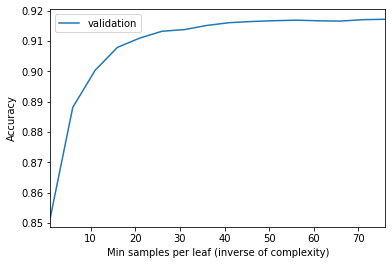

In [45]:
# Split into a sub training set and validation set
X_strain, X_val2, y_strain, y_val2 = train_test_split(X_train, y_train, test_size=0.2, random_state=3360)
print(f"Size of training data: {X_strain.shape[0]}")
print(f"Size of validation data: {X_val.shape[0]}")

min_leaves = range(1,80,5)

Accuracy_val = []
for m in min_leaves:
    # We train the model with only a portion of the training data (the 'sub-training' data set)
    model_val = DecisionTreeClassifier(min_samples_leaf=m, random_state=3360)
    model_val.fit(X_strain, y_strain)
    predictions_val = model_val.predict(X_val2)
    # And we evaluate in the validation set
    accuracy_val = accuracy_score(y_val2, predictions_val,normalize=True, sample_weight=None)
    Accuracy_val.append(accuracy_val)

results = pd.DataFrame({"min_leaves": min_leaves, "validation":Accuracy_val})
plot_fitting_curves(results)

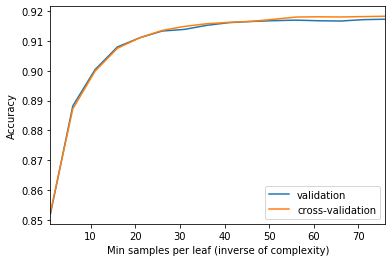

In [46]:
from sklearn.model_selection import cross_val_predict

Accuracy_cv = []
for m in min_leaves:
    # Define hyperparamter for complexity control
    model_cv = DecisionTreeClassifier(min_samples_leaf=m, random_state=3360)
    # Evaluate the performance of the hyperparameter with cross validation. 
    # The parameter 'cv' is used to determine the number of splits (folds). 
    predictions_cv = cross_val_predict(model_cv, X_train, y_train, cv=3)
    accuracy_cv = accuracy_score(y_train, predictions_cv,normalize=True, sample_weight=None)
    Accuracy_cv.append(accuracy_cv)

results = pd.DataFrame({"min_leaves": min_leaves, "validation":Accuracy_val, "cross-validation":Accuracy_cv})
plot_fitting_curves(results)

Again, there seems to be serious overfitting problem.

### GridSearchCV

In [47]:
# create try_grid
try_grid = [{'max_leaf_nodes': np.arange(1, 4)*20,                   
             'min_samples_split': np.arange(2, 4)}]                  

In [48]:
from sklearn.model_selection import GridSearchCV

# create GridSearchCV object
DTM = GridSearchCV(DecisionTreeClassifier(random_state=3360), param_grid=try_grid, cv=3)

In [49]:
DTM.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=3360,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_leaf_nodes': array([20, 40, 60]),
                          'min_samples_split': array([2, 3])}],
       

In [50]:
# find the best parameters
DTM.best_params_

{'max_leaf_nodes': 20, 'min_samples_split': 2}

In [51]:
DTM.best_score_

0.918941660433807

In [52]:
my_model = DecisionTreeClassifier(max_depth = 2,max_leaf_nodes = 20,min_samples_split=2)

In [53]:
my_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [54]:
y_predict = my_model.predict(X_val)

In [55]:
accuracy_score(y_val, y_predict, normalize=True, sample_weight=None)

0.9206217582882136

In [56]:
print("Accuracy:",accuracy_score(y_val, y_predict, normalize=True, sample_weight=None))
print("Confusion Matrix", '\n', confusion_matrix(y_val, y_predict))
print("Classification Report:", '\n', classification_report(y_val, y_predict))

Accuracy: 0.9206217582882136
Confusion Matrix 
 [[56621     0]
 [ 4882     0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56621
           1       0.00      0.00      0.00      4882

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



C:\Users\wclee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Something wrong with the model: The model is making predictions of all 0s. That means the model is not doing anything better than the majority classifier!!
Diagnosis: There might exist some irrelevant variables which lead to
unnecessary complexity

## Balancing the data

In [57]:
print("Out of ", raw_df.shape[0], " customers, only", raw_df['TARGET'].sum(), " cutomers default!")

Out of  307511  customers, only 24825  cutomers default!


### Downsample the nondefault cases

In [58]:
balanced_train = raw_df.drop(raw_df[raw_df.TARGET==0].index[0:257861])
print("Out of ", balanced_train.shape[0], " customers, ", balanced_train['TARGET'].sum(), " customers default!")

Out of  49650  customers,  24825  customers default!


## Feature selection

In [59]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as smf
from scipy.stats import chi2_contingency

#### Use  correlation coefficient to find 30 most important features which have higher associations with response variable Y.

In [60]:
np.abs(balanced_train.corr()["TARGET"]).sort_values(ascending=False).iloc[1:31]

EXT_SOURCE_2                                         0.268228
EXT_SOURCE_3                                         0.262588
DAYS_BIRTH                                           0.146374
REGION_RATING_CLIENT_W_CITY                          0.110686
NAME_EDUCATION_TYPE_Higher education                 0.110609
NAME_INCOME_TYPE_Working                             0.106680
REGION_RATING_CLIENT                                 0.106072
DAYS_LAST_PHONE_CHANGE                               0.104813
NAME_EDUCATION_TYPE_Secondary / secondary special    0.096849
MALE_True                                            0.096572
DAYS_ID_PUBLISH                                      0.093701
NAME_INCOME_TYPE_Pensioner                           0.091515
ORGANIZATION_TYPE_XNA                                0.091029
FLAG_EMP_PHONE                                       0.091019
REG_CITY_NOT_WORK_CITY                               0.090096
DAYS_EMPLOYED                                        0.089132
FLAG_DOC

In [61]:
# Check for collinearity
predictors=list(np.abs(balanced_train.corr()["TARGET"]).sort_values(ascending=False).iloc[1:31].index)
M=balanced_train[predictors].corr()
# check for colinearity: detect those with at least 0.95 (absolute sense)
for i in range(M.shape[0]):
    for j in range(i):
        if M.iloc[i,j]>0.95 or M.iloc[i,j]<-0.95:
            print(M.index[i],M.columns[j], M.iloc[i,j])   

REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY 0.9520013077529532
ORGANIZATION_TYPE_XNA NAME_INCOME_TYPE_Pensioner 0.9992237267820715
FLAG_EMP_PHONE NAME_INCOME_TYPE_Pensioner -0.9990686422966573
FLAG_EMP_PHONE ORGANIZATION_TYPE_XNA -0.9998448024263294
DAYS_EMPLOYED NAME_INCOME_TYPE_Pensioner 0.9991157917645016
DAYS_EMPLOYED ORGANIZATION_TYPE_XNA 0.9998917992912195
DAYS_EMPLOYED FLAG_EMP_PHONE -0.9997359694589643
AMT_CREDIT AMT_GOODS_PRICE 0.984792833970495


In [62]:
#Drop the variable with multicolinearity problem.
balanced_train = balanced_train.drop(columns='FLAG_EMP_PHONE')

In [63]:
balanced_train = balanced_train.drop(columns='ORGANIZATION_TYPE_XNA')

In [64]:
balanced_train = balanced_train.drop(columns='DAYS_EMPLOYED')

In [65]:
np.abs(balanced_train.corr()["TARGET"]).sort_values(ascending=False).iloc[1:31]

EXT_SOURCE_2                                         0.268228
EXT_SOURCE_3                                         0.262588
DAYS_BIRTH                                           0.146374
REGION_RATING_CLIENT_W_CITY                          0.110686
NAME_EDUCATION_TYPE_Higher education                 0.110609
NAME_INCOME_TYPE_Working                             0.106680
REGION_RATING_CLIENT                                 0.106072
DAYS_LAST_PHONE_CHANGE                               0.104813
NAME_EDUCATION_TYPE_Secondary / secondary special    0.096849
MALE_True                                            0.096572
DAYS_ID_PUBLISH                                      0.093701
NAME_INCOME_TYPE_Pensioner                           0.091515
REG_CITY_NOT_WORK_CITY                               0.090096
FLAG_DOCUMENT_3                                      0.085894
DAYS_REGISTRATION                                    0.079501
REG_CITY_NOT_LIVE_CITY                               0.076710
AMT_GOOD

In [66]:
# Check for collinearity
predictors=list(np.abs(balanced_train.corr()["TARGET"]).sort_values(ascending=False).iloc[1:31].index)
M=balanced_train[predictors].corr()
# check for colinearity: detect those with at least 0.95 (absolute sense)
for i in range(M.shape[0]):
    for j in range(i):
        if M.iloc[i,j]>0.95 or M.iloc[i,j]<-0.95:
            print(M.index[i],M.columns[j], M.iloc[i,j])   

REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY 0.9520013077529532
AMT_CREDIT AMT_GOODS_PRICE 0.984792833970495


In [67]:
#Drop the variables with multicolinearity problem.
balanced_train = balanced_train.drop(columns='REGION_RATING_CLIENT')
balanced_train = balanced_train.drop(columns='AMT_CREDIT')

In [68]:
np.abs(balanced_train.corr()["TARGET"]).sort_values(ascending=False).iloc[1:31]

EXT_SOURCE_2                                         0.268228
EXT_SOURCE_3                                         0.262588
DAYS_BIRTH                                           0.146374
REGION_RATING_CLIENT_W_CITY                          0.110686
NAME_EDUCATION_TYPE_Higher education                 0.110609
NAME_INCOME_TYPE_Working                             0.106680
DAYS_LAST_PHONE_CHANGE                               0.104813
NAME_EDUCATION_TYPE_Secondary / secondary special    0.096849
MALE_True                                            0.096572
DAYS_ID_PUBLISH                                      0.093701
NAME_INCOME_TYPE_Pensioner                           0.091515
REG_CITY_NOT_WORK_CITY                               0.090096
FLAG_DOCUMENT_3                                      0.085894
DAYS_REGISTRATION                                    0.079501
REG_CITY_NOT_LIVE_CITY                               0.076710
AMT_GOODS_PRICE                                      0.074462
REGION_P

In [69]:
# Check for collinearity
predictors=list(np.abs(balanced_train.corr()["TARGET"]).sort_values(ascending=False).iloc[1:31].index)
M=balanced_train[predictors].corr()
# check for colinearity: detect those with at least 0.95 (absolute sense)
for i in range(M.shape[0]):
    for j in range(i):
        if M.iloc[i,j]>0.95 or M.iloc[i,j]<-0.95:
            print(M.index[i],M.columns[j], M.iloc[i,j]) 

In [70]:
#Drop unexplicable features
balanced_train = balanced_train.drop(columns='FLAG_DOCUMENT_3')
balanced_train = balanced_train.drop(columns='FLAG_DOCUMENT_6')

In [71]:
np.abs(balanced_train.corr()["TARGET"]).sort_values(ascending=False).iloc[1:31]

EXT_SOURCE_2                                         0.268228
EXT_SOURCE_3                                         0.262588
DAYS_BIRTH                                           0.146374
REGION_RATING_CLIENT_W_CITY                          0.110686
NAME_EDUCATION_TYPE_Higher education                 0.110609
NAME_INCOME_TYPE_Working                             0.106680
DAYS_LAST_PHONE_CHANGE                               0.104813
NAME_EDUCATION_TYPE_Secondary / secondary special    0.096849
MALE_True                                            0.096572
DAYS_ID_PUBLISH                                      0.093701
NAME_INCOME_TYPE_Pensioner                           0.091515
REG_CITY_NOT_WORK_CITY                               0.090096
DAYS_REGISTRATION                                    0.079501
REG_CITY_NOT_LIVE_CITY                               0.076710
AMT_GOODS_PRICE                                      0.074462
REGION_POPULATION_RELATIVE                           0.073908
NAME_CON

In [72]:
#Drop the unexplicable features
balanced_train = balanced_train.drop(columns='ORGANIZATION_TYPE_Business Entity Type 3')

In [73]:
np.abs(balanced_train.corr()["TARGET"]).sort_values(ascending=False).iloc[1:31]

EXT_SOURCE_2                                         0.268228
EXT_SOURCE_3                                         0.262588
DAYS_BIRTH                                           0.146374
REGION_RATING_CLIENT_W_CITY                          0.110686
NAME_EDUCATION_TYPE_Higher education                 0.110609
NAME_INCOME_TYPE_Working                             0.106680
DAYS_LAST_PHONE_CHANGE                               0.104813
NAME_EDUCATION_TYPE_Secondary / secondary special    0.096849
MALE_True                                            0.096572
DAYS_ID_PUBLISH                                      0.093701
NAME_INCOME_TYPE_Pensioner                           0.091515
REG_CITY_NOT_WORK_CITY                               0.090096
DAYS_REGISTRATION                                    0.079501
REG_CITY_NOT_LIVE_CITY                               0.076710
AMT_GOODS_PRICE                                      0.074462
REGION_POPULATION_RELATIVE                           0.073908
NAME_CON

In [74]:
# Check for collinearity
predictors=list(np.abs(balanced_train.corr()["TARGET"]).sort_values(ascending=False).iloc[1:31].index)
M=balanced_train[predictors].corr()
# check for colinearity: detect those with at least 0.95 (absolute sense)
for i in range(M.shape[0]):
    for j in range(i):
        if M.iloc[i,j]>0.95 or M.iloc[i,j]<-0.95:
            print(M.index[i],M.columns[j], M.iloc[i,j]) 

In [75]:
#Drop unexplicable features
balanced_train = balanced_train.drop(columns='FLAG_PHONE')

In [76]:
np.abs(balanced_train.corr()["TARGET"]).sort_values(ascending=False).iloc[1:31]

EXT_SOURCE_2                                         0.268228
EXT_SOURCE_3                                         0.262588
DAYS_BIRTH                                           0.146374
REGION_RATING_CLIENT_W_CITY                          0.110686
NAME_EDUCATION_TYPE_Higher education                 0.110609
NAME_INCOME_TYPE_Working                             0.106680
DAYS_LAST_PHONE_CHANGE                               0.104813
NAME_EDUCATION_TYPE_Secondary / secondary special    0.096849
MALE_True                                            0.096572
DAYS_ID_PUBLISH                                      0.093701
NAME_INCOME_TYPE_Pensioner                           0.091515
REG_CITY_NOT_WORK_CITY                               0.090096
DAYS_REGISTRATION                                    0.079501
REG_CITY_NOT_LIVE_CITY                               0.076710
AMT_GOODS_PRICE                                      0.074462
REGION_POPULATION_RELATIVE                           0.073908
NAME_CON

In [77]:
# Check for collinearity
predictors=list(np.abs(balanced_train.corr()["TARGET"]).sort_values(ascending=False).iloc[1:31].index)
M=balanced_train[predictors].corr()
# check for colinearity: detect those with at least 0.95 (absolute sense)
for i in range(M.shape[0]):
    for j in range(i):
        if M.iloc[i,j]>0.95 or M.iloc[i,j]<-0.95:
            print(M.index[i],M.columns[j], M.iloc[i,j]) 

In [78]:
#Store the chosen features
selected_features=['EXT_SOURCE_3','EXT_SOURCE_2','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','NAME_EDUCATION_TYPE_Higher education','NAME_INCOME_TYPE_Working','DAYS_LAST_PHONE_CHANGE','NAME_EDUCATION_TYPE_Secondary / secondary special','MALE_True','DAYS_ID_PUBLISH','NAME_INCOME_TYPE_Pensioner','REG_CITY_NOT_WORK_CITY','DAYS_REGISTRATION','REG_CITY_NOT_LIVE_CITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','NAME_CONTRACT_TYPE_Revolving loans','LIVE_CITY_NOT_WORK_CITY','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OCCUPATION_TYPE_Drivers','FLAG_WORK_PHONE','ORGANIZATION_TYPE_Self-employed','NAME_HOUSING_TYPE_With parents','NAME_FAMILY_STATUS_Single / not married','NAME_HOUSING_TYPE_House / apartment','NAME_INCOME_TYPE_State servant','NAME_FAMILY_STATUS_Married','FLAG_OWN_CAR_Y','HOUR_APPR_PROCESS_START']
len(selected_features)

30

## Build Tree

In [79]:
# define independent variables / attirbutes / features
features = selected_features
# define one single target variable / label
target = ['TARGET']

# get defined training dataset
X = balanced_train[features]
y = balanced_train[target]

In [80]:
# split data into 80% and 20%, put 20% in testing
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=3360)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39720 entries, 115152 to 431276
Data columns (total 30 columns):
EXT_SOURCE_3                                         39720 non-null float64
EXT_SOURCE_2                                         39720 non-null float64
DAYS_BIRTH                                           39720 non-null int64
REGION_RATING_CLIENT_W_CITY                          39720 non-null int64
NAME_EDUCATION_TYPE_Higher education                 39720 non-null int64
NAME_INCOME_TYPE_Working                             39720 non-null int64
DAYS_LAST_PHONE_CHANGE                               39720 non-null float64
NAME_EDUCATION_TYPE_Secondary / secondary special    39720 non-null int64
MALE_True                                            39720 non-null uint8
DAYS_ID_PUBLISH                                      39720 non-null int64
NAME_INCOME_TYPE_Pensioner                           39720 non-null int64
REG_CITY_NOT_WORK_CITY                               39720 non-nu

In [81]:
# define our model as a decision tree model
model = DecisionTreeClassifier(random_state=3360)

In [82]:
# build the decision tree model based on defalut hyperparameter settings
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=3360, splitter='best')

### Evaluate the model

In [83]:
# test model base on 20% data
pred_val = model.predict(X_val)

In [84]:
# print evaluation result for 20% test data
print("Accuracy from 20% test data:",accuracy_score(y_val, pred_val, normalize=True, sample_weight=None))
print("Confusion Matrix", '\n', confusion_matrix(y_val, pred_val))
print("Classification Report:", '\n', classification_report(y_val, pred_val))

Accuracy from 20% test data: 0.5736153071500504
Confusion Matrix 
 [[2893 2077]
 [2157 2803]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.58      0.58      4970
           1       0.57      0.57      0.57      4960

    accuracy                           0.57      9930
   macro avg       0.57      0.57      0.57      9930
weighted avg       0.57      0.57      0.57      9930



In [85]:
# test model base on 80% data for training
pred_val_Xtrain= model.predict(X_train)

In [86]:
# print evaluation result for 80% train data
print("Accuracy from 80% train data:",accuracy_score(y_train, pred_val_Xtrain, normalize=True, sample_weight=None))
print("Confusion Matrix", '\n', confusion_matrix(y_train, pred_val_Xtrain))
print("Classification Report:", '\n', classification_report(y_train, pred_val_Xtrain))

Accuracy from 80% train data: 1.0
Confusion Matrix 
 [[19855     0]
 [    0 19865]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19855
           1       1.00      1.00      1.00     19865

    accuracy                           1.00     39720
   macro avg       1.00      1.00      1.00     39720
weighted avg       1.00      1.00      1.00     39720



### Manual Hyperparameter Tuning (Tuning tree depth)

In [87]:
# create an array that holds the max_depth
max_depth = np. linspace(1,10,10, endpoint=True)

In [88]:
max_depth

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [89]:
# create a loop to try out different depth value
train_results =[]
test_results = []
# create a loop to try out all the number from 1 to 32 for max_depths in a decision tree
for max_depth_i in max_depth:
    dt = DecisionTreeClassifier(max_depth=max_depth_i)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    accuracy = accuracy_score(y_train, train_pred, normalize=True, sample_weight=None)
    train_results.append(accuracy)
    
    y_pred = dt.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred, normalize=True, sample_weight=None)
    test_results.append(accuracy)

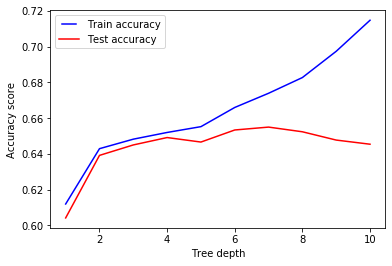

In [90]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth, train_results, 'b', label='Train accuracy')
line2, = plt.plot(max_depth, test_results, 'r', label='Test accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()

Best result: max_depth = 7

### 3-fold Cross validation for tuning min_samples_leaf

Size of training data: 31776
Size of validation data: 9930


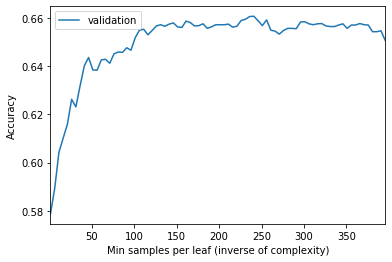

In [91]:
# Split into a sub training set and validation set
X_strain, X_val2, y_strain, y_val2 = train_test_split(X_train, y_train, test_size=0.2, random_state=3360)
print(f"Size of training data: {X_strain.shape[0]}")
print(f"Size of validation data: {X_val.shape[0]}")

min_leaves = range(1,400,5)

Accuracy_val = []
for m in min_leaves:
    # We train the model with only a portion of the training data (the 'sub-training' data set)
    model_val = DecisionTreeClassifier(min_samples_leaf=m, random_state=3360)
    model_val.fit(X_strain, y_strain)
    predictions_val = model_val.predict(X_val2)
    # And we evaluate in the validation set
    accuracy_val = accuracy_score(y_val2, predictions_val,normalize=True, sample_weight=None)
    Accuracy_val.append(accuracy_val)

results = pd.DataFrame({"min_leaves": min_leaves, "validation":Accuracy_val})
plot_fitting_curves(results)

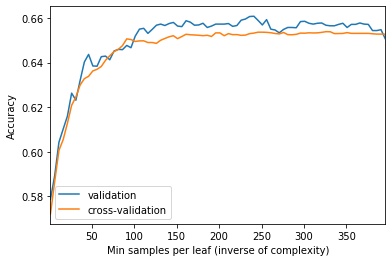

In [92]:
from sklearn.model_selection import cross_val_predict

Accuracy_cv = []
for m in min_leaves:
    # Define hyperparamter for complexity control
    model_cv = DecisionTreeClassifier(min_samples_leaf=m, random_state=3360)
    # Evaluate the performance of the hyperparameter with cross validation. 
    # The parameter 'cv' is used to determine the number of splits (folds). 
    predictions_cv = cross_val_predict(model_cv, X_train, y_train, cv=3)
    accuracy_cv = accuracy_score(y_train, predictions_cv,normalize=True, sample_weight=None)
    Accuracy_cv.append(accuracy_cv)

results = pd.DataFrame({"min_leaves": min_leaves, "validation":Accuracy_val, "cross-validation":Accuracy_cv})
plot_fitting_curves(results)

Best result: min_samples_leaf = 100

### GridSearchCV

This time, we would not train other hyperparameters, as overtunning might also lead to overfitting and bad accuracy.

In [93]:
# create try_grid
try_grid = [{'max_depth': np. linspace(1,10,10, endpoint=True),         
             'min_samples_leaf': range(1,300,3)}]               

In [94]:
from sklearn.model_selection import GridSearchCV

# create GridSearchCV object
DTM = GridSearchCV(DecisionTreeClassifier(random_state=3360), param_grid=try_grid, cv=3)

In [95]:
DTM.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=3360,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                          'min_samples

In [96]:
# find the best parameters
DTM.best_params_

{'max_depth': 9.0, 'min_samples_leaf': 196}

In [97]:
DTM.best_score_

0.6539526686807654

In [98]:
my_model = DecisionTreeClassifier(max_depth = 9,min_samples_leaf=196)

In [99]:
my_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=196, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [100]:
y_predict = my_model.predict(X_val)

In [101]:
print("Accuracy:",accuracy_score(y_val, y_predict, normalize=True, sample_weight=None))
print("Confusion Matrix", '\n', confusion_matrix(y_val, y_predict))
print("Classification Report:", '\n', classification_report(y_val, y_predict))

Accuracy: 0.6620342396777442
Confusion Matrix 
 [[3249 1721]
 [1635 3325]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.65      0.66      4970
           1       0.66      0.67      0.66      4960

    accuracy                           0.66      9930
   macro avg       0.66      0.66      0.66      9930
weighted avg       0.66      0.66      0.66      9930



## New attempt

What if this time we only use 20 features?

In [102]:
selected_features=['EXT_SOURCE_3','EXT_SOURCE_2','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','NAME_EDUCATION_TYPE_Higher education','NAME_INCOME_TYPE_Working','DAYS_LAST_PHONE_CHANGE','NAME_EDUCATION_TYPE_Secondary / secondary special','MALE_True','DAYS_ID_PUBLISH','NAME_INCOME_TYPE_Pensioner','REG_CITY_NOT_WORK_CITY','DAYS_REGISTRATION','REG_CITY_NOT_LIVE_CITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','NAME_CONTRACT_TYPE_Revolving loans','LIVE_CITY_NOT_WORK_CITY','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
len(selected_features)

20

In [103]:
# define independent variables / attirbutes / features
features = selected_features
# define one single target variable / label
target = ['TARGET']

# get defined training dataset
X = balanced_train[features]
y = balanced_train[target]

In [104]:
# split data into 80% and 20%, put 20% in testing
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=3360)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39720 entries, 115152 to 431276
Data columns (total 20 columns):
EXT_SOURCE_3                                         39720 non-null float64
EXT_SOURCE_2                                         39720 non-null float64
DAYS_BIRTH                                           39720 non-null int64
REGION_RATING_CLIENT_W_CITY                          39720 non-null int64
NAME_EDUCATION_TYPE_Higher education                 39720 non-null int64
NAME_INCOME_TYPE_Working                             39720 non-null int64
DAYS_LAST_PHONE_CHANGE                               39720 non-null float64
NAME_EDUCATION_TYPE_Secondary / secondary special    39720 non-null int64
MALE_True                                            39720 non-null uint8
DAYS_ID_PUBLISH                                      39720 non-null int64
NAME_INCOME_TYPE_Pensioner                           39720 non-null int64
REG_CITY_NOT_WORK_CITY                               39720 non-nu

In [105]:
# define our model as a decision tree model
model = DecisionTreeClassifier(random_state=3360)

In [106]:
# build the decision tree model based on defalut hyperparameter settings
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=3360, splitter='best')

In [107]:
# test model base on 20% data
pred_val = model.predict(X_val)

In [108]:
# print evaluation result for 20% test data
print("Accuracy from 20% test data:",accuracy_score(y_val, pred_val, normalize=True, sample_weight=None))
print("Confusion Matrix", '\n', confusion_matrix(y_val, pred_val))
print("Classification Report:", '\n', classification_report(y_val, pred_val))

Accuracy from 20% test data: 0.5726082578046324
Confusion Matrix 
 [[2868 2102]
 [2142 2818]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.58      0.57      4970
           1       0.57      0.57      0.57      4960

    accuracy                           0.57      9930
   macro avg       0.57      0.57      0.57      9930
weighted avg       0.57      0.57      0.57      9930



In [109]:
# test model base on 80% data for training
pred_val_Xtrain= model.predict(X_train)

In [110]:
# print evaluation result for 80% train data
print("Accuracy from 80% train data:",accuracy_score(y_train, pred_val_Xtrain, normalize=True, sample_weight=None))
print("Confusion Matrix", '\n', confusion_matrix(y_train, pred_val_Xtrain))
print("Classification Report:", '\n', classification_report(y_train, pred_val_Xtrain))

Accuracy from 80% train data: 1.0
Confusion Matrix 
 [[19855     0]
 [    0 19865]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19855
           1       1.00      1.00      1.00     19865

    accuracy                           1.00     39720
   macro avg       1.00      1.00      1.00     39720
weighted avg       1.00      1.00      1.00     39720



### Manual Hyperparameter Tuning (Tuning tree depth)

In [111]:
# create an array that holds the max_depth
max_depth = np. linspace(1,10,10, endpoint=True)

In [112]:
max_depth

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [113]:
# create a loop to try out different depth value
train_results =[]
test_results = []
# create a loop to try out all the number from 1 to 32 for max_depths in a decision tree
for max_depth_i in max_depth:
    dt = DecisionTreeClassifier(max_depth=max_depth_i)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    accuracy = accuracy_score(y_train, train_pred, normalize=True, sample_weight=None)
    train_results.append(accuracy)
    
    y_pred = dt.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred, normalize=True, sample_weight=None)
    test_results.append(accuracy)

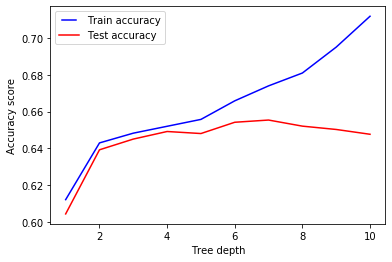

In [114]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth, train_results, 'b', label='Train accuracy')
line2, = plt.plot(max_depth, test_results, 'r', label='Test accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()

Optimal tree depth is around 6

### 5-fold Cross validation for tuning min_samples_leaf

In [115]:
# Function to plot the results
def plot_fitting_curves(results):
    results.plot("min_leaves")
    plt.ylabel("Accuracy")
    plt.xlabel("Min samples per leaf (inverse of complexity)")
    plt.show()

Size of training data: 31776
Size of validation data: 9930


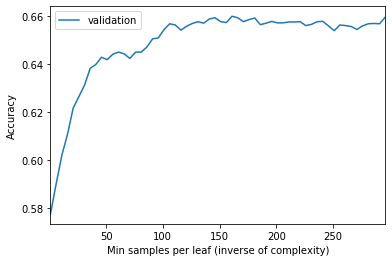

In [116]:
# Split into a sub training set and validation set
X_strain, X_val2, y_strain, y_val2 = train_test_split(X_train, y_train, test_size=0.2, random_state=3360)
print(f"Size of training data: {X_strain.shape[0]}")
print(f"Size of validation data: {X_val.shape[0]}")

min_leaves = range(1,300,5)

Accuracy_val = []
for m in min_leaves:
    # We train the model with only a portion of the training data (the 'sub-training' data set)
    model_val = DecisionTreeClassifier(min_samples_leaf=m, random_state=3360)
    model_val.fit(X_strain, y_strain)
    predictions_val = model_val.predict(X_val2)
    # And we evaluate in the validation set
    accuracy_val = accuracy_score(y_val2, predictions_val,normalize=True, sample_weight=None)
    Accuracy_val.append(accuracy_val)

results = pd.DataFrame({"min_leaves": min_leaves, "validation":Accuracy_val})
plot_fitting_curves(results)

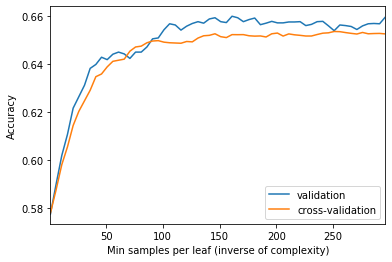

In [117]:
from sklearn.model_selection import cross_val_predict

Accuracy_cv = []
for m in min_leaves:
    # Define hyperparamter for complexity control
    model_cv = DecisionTreeClassifier(min_samples_leaf=m, random_state=3360)
    # Evaluate the performance of the hyperparameter with cross validation. 
    # The parameter 'cv' is used to determine the number of splits (folds). 
    predictions_cv = cross_val_predict(model_cv, X_train, y_train, cv=3)
    accuracy_cv = accuracy_score(y_train, predictions_cv,normalize=True, sample_weight=None)
    Accuracy_cv.append(accuracy_cv)

results = pd.DataFrame({"min_leaves": min_leaves, "validation":Accuracy_val, "cross-validation":Accuracy_cv})
plot_fitting_curves(results)

100 is fine.

### GridSearchCV

In [118]:
# create try_grid
try_grid = [{'max_depth': np. linspace(1,10,10, endpoint=True),         
             'min_samples_leaf': range(1,300,3)}]  

In [119]:
from sklearn.model_selection import GridSearchCV

# create GridSearchCV object
DTM = GridSearchCV(DecisionTreeClassifier(random_state=3360), param_grid=try_grid, cv=3)

In [120]:
DTM.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=3360,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                          'min_samples

In [121]:
# find the best parameters
DTM.best_params_

{'max_depth': 7.0, 'min_samples_leaf': 109}

In [122]:
DTM.best_score_

0.65365055387714

In [123]:
my_model = DecisionTreeClassifier(max_depth = 7,min_samples_leaf=109)

In [124]:
my_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=109, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [125]:
y_predict = my_model.predict(X_val)

In [126]:
print("Accuracy:",accuracy_score(y_val, y_predict, normalize=True, sample_weight=None))
print("Confusion Matrix", '\n', confusion_matrix(y_val, y_predict))
print("Classification Report:", '\n', classification_report(y_val, y_predict))

Accuracy: 0.6576032225579054
Confusion Matrix 
 [[3363 1607]
 [1793 3167]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.68      0.66      4970
           1       0.66      0.64      0.65      4960

    accuracy                           0.66      9930
   macro avg       0.66      0.66      0.66      9930
weighted avg       0.66      0.66      0.66      9930



### GridSearchCV with cost analysis

In [127]:
# create try_grid
try_grid = [{'max_depth': np. linspace(1,10,10, endpoint=True),         
             'min_samples_leaf': range(1,300,3)}]   

In [128]:
import sys
sys.path.insert(0,"../..")

In [129]:
#import homemade cost function
from utils.custom_cost import custom_loss

In [130]:
from sklearn.model_selection import GridSearchCV

# create GridSearchCV object
DTM = GridSearchCV(DecisionTreeClassifier(random_state=3360), param_grid=try_grid, cv=3, scoring = custom_loss)

In [131]:
DTM.fit(X_train,y_train)

28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
28693524
23811578
29276674
2

21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
21126518
20910620
21719436
2

22380312
23016984
23073970
22373364
22922790
23049820
22372804
22954954
23068760
22323550
22881044
23068760
22146872
22832686
23068760
22220782
22875664
23075372
22226834
22870396
23069096
22304834
23034298
23062596
22286790
23108208
23049708
22319626
23146648
23033290
22356946
23146648
23036484
22405976
23126028
23036484
22380088
23129110
23088148
22383394
23051894
23014350
22344618
23057946
23007850
22359804
22890850
23007850
22282924
22858014
23011156
22308812
22857006
22911358
22260736
23308086
22891522
22318116
23284720
22894828
22298280
23345182
22756590
22324952
23207504
22737090
22345236
23244094
22737090
22249528
23244206
22245048
22268804
23011438
22238548
22265386
23011438
21980228
22322094
22864962
21961400
22322094
22864962
21954900
22014014
22864962
21967900
21942178
22864962
22086078
22227676
22864962
22185540
22198818
22871462
22407830
22181334
22871462
22346248
22184528
22854820
22263988
22214058
22851514
22263988
22270148
22851514
22260794
22270148
22851514
22399144
2

22914382
23439758
22572902
22928672
23282468
22881654
22895836
23319676
22730640
22845180
23049870
22725148
22675508
22972542
22778604
22687836
22924856
22957020
22767516
23110278
22546118
22787970
23208002
22567244
22858014
23175390
22396506
22876730
23176286
22384626
22648052
23205816
22568194
22776596
23098398
22622268
22255808
22934160
22599350
22303046
23028748
22720386
22321986
23034240
22916058
22267240
23006672
22899304
22340814
22745046
22876274
22135502
22516592
22748178
22226614
22452600
22455844
22190248
22316660
22520732
22183412
22307078
22637230
22093084
22383676
22686036
22199606
22314698
22425194
22162232
22292116
22752326
22058232
22650122
22789140
22089442
22497482
22607924
22284052
22755130
22676902
22240008
22673878
22696402
22245948
22653200
22654432
21998442
22723190
22721730
21701902
22858964
22728006
21701902
22596832
22777542
21698708
22425870
22796818
21896960
22582488
22856496
21880542
22792956
22817048
21874042
22799568
22743474
21903684
22799680
22596160
2

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=3360,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                          'min_samples

In [132]:
# find the best parameters
DTM.best_params_

{'max_depth': 2.0, 'min_samples_leaf': 1}

In [133]:
DTM.best_score_

-20877539.548640482

In [135]:
my_model = DecisionTreeClassifier(max_depth = 2,min_samples_leaf=1)

In [136]:
my_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [137]:
y_predict = my_model.predict(X_val)

In [138]:
print("Accuracy:",accuracy_score(y_val, y_predict, normalize=True, sample_weight=None))
print("Confusion Matrix", '\n', confusion_matrix(y_val, y_predict))
print("Classification Report:", '\n', classification_report(y_val, y_predict))

Accuracy: 0.6391742195367573
Confusion Matrix 
 [[3523 1447]
 [2136 2824]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.71      0.66      4970
           1       0.66      0.57      0.61      4960

    accuracy                           0.64      9930
   macro avg       0.64      0.64      0.64      9930
weighted avg       0.64      0.64      0.64      9930



### Conclusion and findings

The results are fairly predictive, better than the majority classifier.
The 20-feature model yields similar results to the 30-feature model.
We prefer simplicity, so we will take the 20-feature model as the final model for this part.

The cost-function helped us to select the best model, despite having a slightly lower accuracy.

p.s. We've been thinking of using k-means clustering to detect outliers and remove them. But there are several reasons we did not implement it. 1.We have no idea how to choose the value of k. 2. There are too many features so that curse of dimensionality will occur. We want to preserve as many data instances as possible. 3. Since the dataset is extremely imbalance, and the default cases are actually outliers, we want to find out those outliers more than to remove them.

## This is the end of Part 2.1 Decision Tree Classifier.